# <span style="font-family:Bebas Neue; font-size:1em;">Proyecto Semestral - IEE2103</span>

A partir del desarrollo en Wolfram Mathematica, se obtuvo que $s(x) = \ \uparrow \uparrow _{c} \ast \ a \cdot \wedge \left( \frac{1 - \frac{L}{2}}{\frac{L}{2}} \right)$ 

De esta manera, $s(x, t) = \ \frac{a}{2} \cdot \left( \wedge \left( \frac{1 - \frac{L}{2} - ct}{\frac{L}{2}} \right) + \wedge \left( \frac{1 - \frac{L}{2} + ct}{\frac{L}{2}} \right) \right)$ 

In [1]:
# Librerías
import numpy as np
from math import sqrt, ceil, floor, exp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import random
import sounddevice as sd
from IPython.display import clear_output

In [2]:
def triangulo(x):
    return 2 * abs((x / 2) % 2 - 1) - 1

def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.7,                    # largo de cuerda estándar
    c = 1.8012 * (10 ** -4),    # velocidad
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.4                    # tensión
    ):
    
    return (a / 2) * (triangulo((x - L / 2 - c * t) / (L / 2)) + triangulo((x - L / 2 + c * t) / (L / 2)))

In [3]:
'''
fig, ax = plt.subplots()

L = 0.648
t = np.arange(0.0, 5, 0.001)
s = s(L, t)
l = plt.plot(t, s)

ax = plt.axis([0, L, -1, 1])

redDot, = plt.plot([L / 2], [s(L / 2, 0)], 'ro')

def animate(i):
    redDot.set_data(i, s(L, i))
    return redDot,

myAnimation = FuncAnimation(fig, animate, frames=np.arange(0.0, 5, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()
'''

'''
L = 0.648                       #largo de una cuerda estandar 

#--------------------------------------------------------------------------------------------------------------------------------


list_x = np.linspace(0, 1000)
fig, ax = plt.subplots()
ax.set_ylim(-1, 1)
def animate(i):
    y = list(map(lambda x:s(x, i, L = 0.648), list_x))
    ax.plot(list_x,y,color = "green")

ani = FuncAnimation(fig, animate, frames = np.arange(0.0, 5.0, 0.2), interval = 10, repeat = True)
plt.show()
'''

'\nL = 0.648                       #largo de una cuerda estandar \n\n#--------------------------------------------------------------------------------------------------------------------------------\n\n\nlist_x = np.linspace(0, 1000)\nfig, ax = plt.subplots()\nax.set_ylim(-1, 1)\ndef animate(i):\n    y = list(map(lambda x:s(x, i, L = 0.648), list_x))\n    ax.plot(list_x,y,color = "green")\n\nani = FuncAnimation(fig, animate, frames = np.arange(0.0, 5.0, 0.2), interval = 10, repeat = True)\nplt.show()\n'

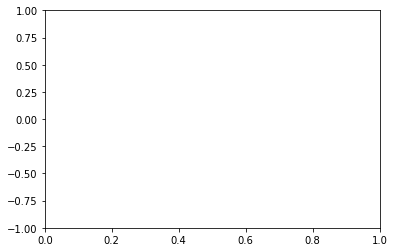

In [4]:
def animate(i):
    ax.clear()
    y = list(map(lambda x:s(x, i*100, L = 0.648), list_x))
    ax.plot(list_x, y)
    ax.set_ylim(-1, 1)
    ax.plot(list_x,y,color = "green")
                       #largo de una cuerda estandar 

#--------------------------------------------------------------------------------------------------------------------------------

L = 0.648
list_x = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(1,1)
ax.set_ylim(-1,1)
ani = FuncAnimation(fig, animate, frames = 1000, interval = 60)
plt.show()     

Se redefine la función $s(x, t)$ para que la velocidad no sea una constante, sino que esté determinada por $c = \sqrt{\frac{T}{\mu}}$, donde $T$ representa la tensión de la cuerda y $\mu$ la densidad por unidad de largo.

In [3]:
def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.648,                  # largo de cuerda estándar    
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.40,                  # tensión
    fm = 44100
    ):
    
    muestra = np.linspace(0, t, ceil(t * fm))
    c = sqrt(T / u)
    
    return (a / 2) * (triangulo((x - L / 2 - c * muestra) / (L / 2)) + triangulo((x - L / 2 + c * muestra) / (L / 2)))

In [4]:
def envolvente(x, t, fm = 44100):
    
    envelope = []
    num = 0
    aux = {
        0: 0,
        1: 0.064,
        2: 0.154,
        3: 0.604,
        4: 0.95
        }

    for i in x:
        
        num += (1 / (fm * t))

        if num < aux[1]:
            envelope.append((i / 0.08) * num)
        
        elif num < aux[2]:
            envelope.append(i * (1 - (1 / 0.185) * (num - 0.024)))
        
        elif num < aux[3]:
            envelope.append(0.3 * i)
        
        elif num < aux[4]:
            envelope.append(i * (-0.858) * (num - 0.95))
        
        else:
            envelope.append(0)

    maximo = max(envelope)
    
    for j in range(len(envelope)):
        envelope[j] = envelope[j] / maximo
    
    return envelope

In [5]:
# Definición de constantes

fm = 44100
duracion = 2
# muestra = np.linspace(0, duracion, 2 * duracion * fm)
amplitud = 1
largo_cuerda = 0.648

In [6]:
sonido = s(largo_cuerda / 2, duracion, a = amplitud, fm = fm , L = largo_cuerda)

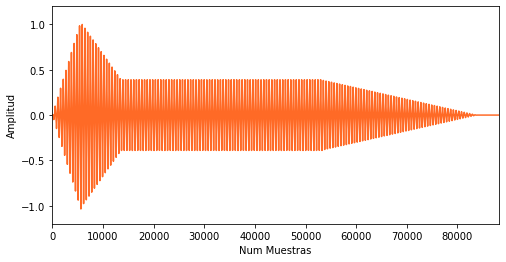

In [78]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_xlim(0, fm * duracion)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('Num Muestras')
ax.set_ylabel('Amplitud')
plt.plot(envolvente(sonido, duracion, fm), color = '#FF6A26')
sd.play(envolvente(sonido, duracion, fm), fm)

In [8]:
class Cuerda:

    def __init__(self, nombre: str, tension: float, densidad: float, amplitud = 1, largo = 0.648):
        self.nombre = nombre
        self.tension = tension
        self.densidad = densidad
        self.amplitud = amplitud
        self.largo = largo

    def crear_sonido(self, duracion):
        return s(self.largo / 2, duracion, a = self.amplitud, L = self.largo, u = self.densidad, T = self.tension)
    
    def __repr__(self):
        return f'Cuerda: {self.nombre}\n' \
            + f'Tensión: {self.tension}\n' \
            + f'Densidad: {self.densidad}\n' \
            + f'Amplitud: {self.amplitud}\n' \
            + f'Largo: {self.largo}\n'

In [9]:
cuerdas = (
    ((0, 0), Cuerda('HI E', 56.40, 3.09 * (10 ** -4))),
    ((0, 1), Cuerda('B', 48.86, 4.77 * (10 ** -4))),
    ((1, 0), Cuerda('G', 66.61, 1.03 * (10 ** -3))),
    ((1, 1), Cuerda('D', 58.55, 1.62 * (10 ** -3))),
    ((2, 0), Cuerda('A', 71.11, 3.50 * (10 ** -3))),
    ((2, 1), Cuerda('LOW E', 65.90, 5.78 * (10 ** -3))),
)

In [10]:
duracion = 2
sonido = cuerdas[5][1].crear_sonido(duracion)
print(f'Actualmente suena la cuerda {cuerdas[5][1].nombre}')

sd.play(envolvente(sonido, duracion, fm), fm)
sd.wait()

Actualmente suena la cuerda LOW E


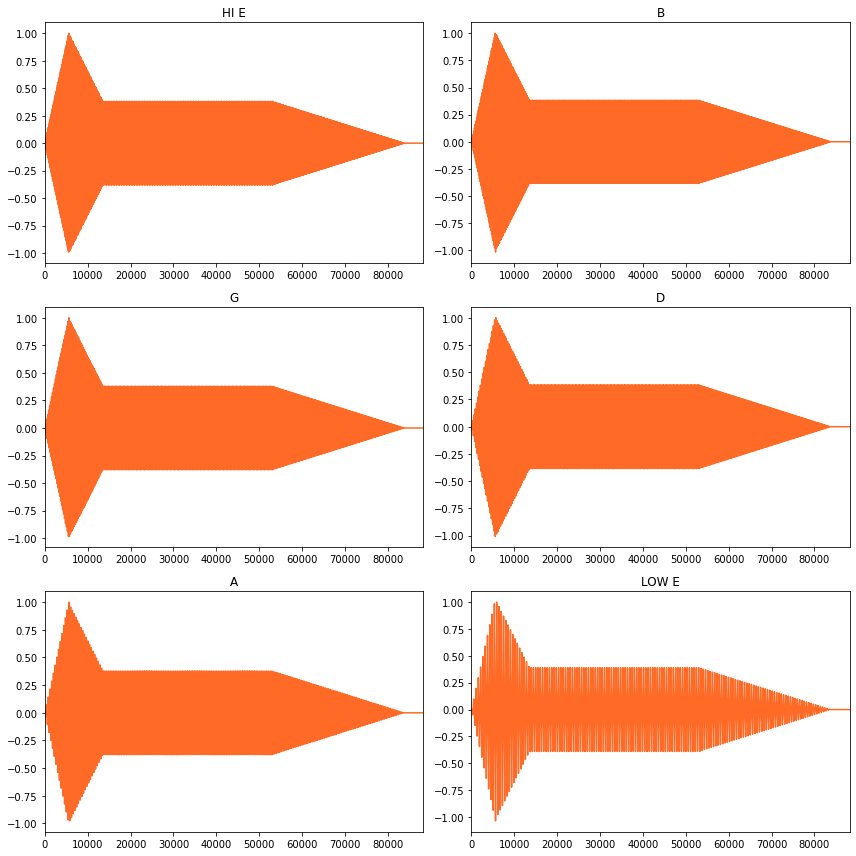

In [77]:
fig, ax = plt.subplots(3, 2, figsize = (12, 12))

rasguido = 0
for pos, cuerda in cuerdas:

    duracion = 2
    sonido = cuerda.crear_sonido(duracion)
    rasguido += sonido

    ax[pos[0], pos[1]].plot(envolvente(sonido, duracion, fm), color = '#FF6A26')
    ax[pos[0], pos[1]].set_title(cuerda.nombre) # Escojemos un título para el gráfico
    ax[pos[0], pos[1]].set_xlim(0, fm * duracion)

    print(f'Actualmente suena la cuerda {cuerda.nombre}')

    sd.play(envolvente(sonido, duracion, fm), fm)
    sd.wait()

    clear_output(wait = True)

print(f'Actualmente suena el rasguido')

sd.play(envolvente(rasguido, duracion, fm), fm)
sd.wait()

clear_output(wait = True)

plt.tight_layout()
plt.show()

In [11]:
def sonido_rasguido(duracion):
    
    cuerdas = (
        Cuerda('HI E', 56.40, 3.09 * (10 ** -4)),
        Cuerda('B', 48.86, 4.77 * (10 ** -4)),
        Cuerda('G', 66.61, 1.03 * (10 ** -3)),
        Cuerda('D', 58.55, 1.62 * (10 ** -3)),
        Cuerda('A', 71.11, 3.50 * (10 ** -3)),
        Cuerda('LOW E', 65.90, 5.78 * (10 ** -3)),
    )

    rasguido = 0

    for cuerda in cuerdas:
        sonido = cuerda.crear_sonido(duracion)
        rasguido += sonido

    return rasguido

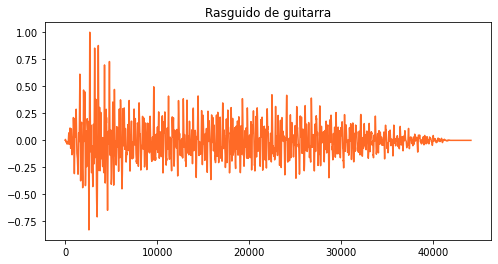

In [76]:
duracion = 1

fit, ax = plt.subplots(figsize = (8, 4))
plt.plot(envolvente((sonido_rasguido(duracion)), duracion, fm), color = '#FF6A26')
plt.title('Rasguido de guitarra')
plt.show()
sd.play(envolvente((sonido_rasguido(duracion)), duracion, fm), fm)
sd.wait()

In [13]:
def largo_traste(n, l):
    return l / (2 ** (n / 12))

In [14]:
def crear_acorde(lista, duracion):

    cuerdas = (
        ((0, 0), Cuerda('HI E', 56.40, 3.09 * (10 ** -4))),
        ((0, 1), Cuerda('B', 48.86, 4.77 * (10 ** -4))),
        ((1, 0), Cuerda('G', 66.61, 1.03 * (10 ** -3))),
        ((1, 1), Cuerda('D', 58.55, 1.62 * (10 ** -3))),
        ((2, 0), Cuerda('A', 71.11, 3.50 * (10 ** -3))),
        ((2, 1), Cuerda('LOW E', 65.90, 5.78 * (10 ** -3))),
    )
    
    sonido = []

    for num_cuerda, traste in lista:
        sonido.append(
            s(
                x = largo_traste(traste, cuerdas[num_cuerda][1].largo) / 2, \
                t = duracion, \
                T = cuerdas[num_cuerda][1].tension, \
                u = cuerdas[num_cuerda][1].densidad, \
                L = largo_traste(traste, cuerdas[num_cuerda][1].largo)
            )
        )
    
    return sum(sonido)

In [72]:
duracion = 1

Do = crear_acorde([(1, 3), (2, 2), (3, 0), (4, 1), (5, 0)], duracion)
Re = crear_acorde([(2, 0), (3, 2), (4, 3), (5, 2)], duracion)
Mi = crear_acorde([(0, 0), (1, 2), (2, 2), (3, 1), (4, 0), (5, 0)], duracion)
Fa = crear_acorde([(0, 1), (1, 3), (2, 3), (3, 2), (4, 1), (5, 1)], duracion)
Sol = crear_acorde([(0, 3), (1, 2), (2, 0), (3, 0), (4, 0), (5, 3)], duracion)
La = crear_acorde([(1, 0), (2, 2), (3, 2), (4, 2), (5, 0)], duracion)
Si = crear_acorde([(1, 1), (2, 3), (3, 3), (4, 3), (5, 1)], duracion)

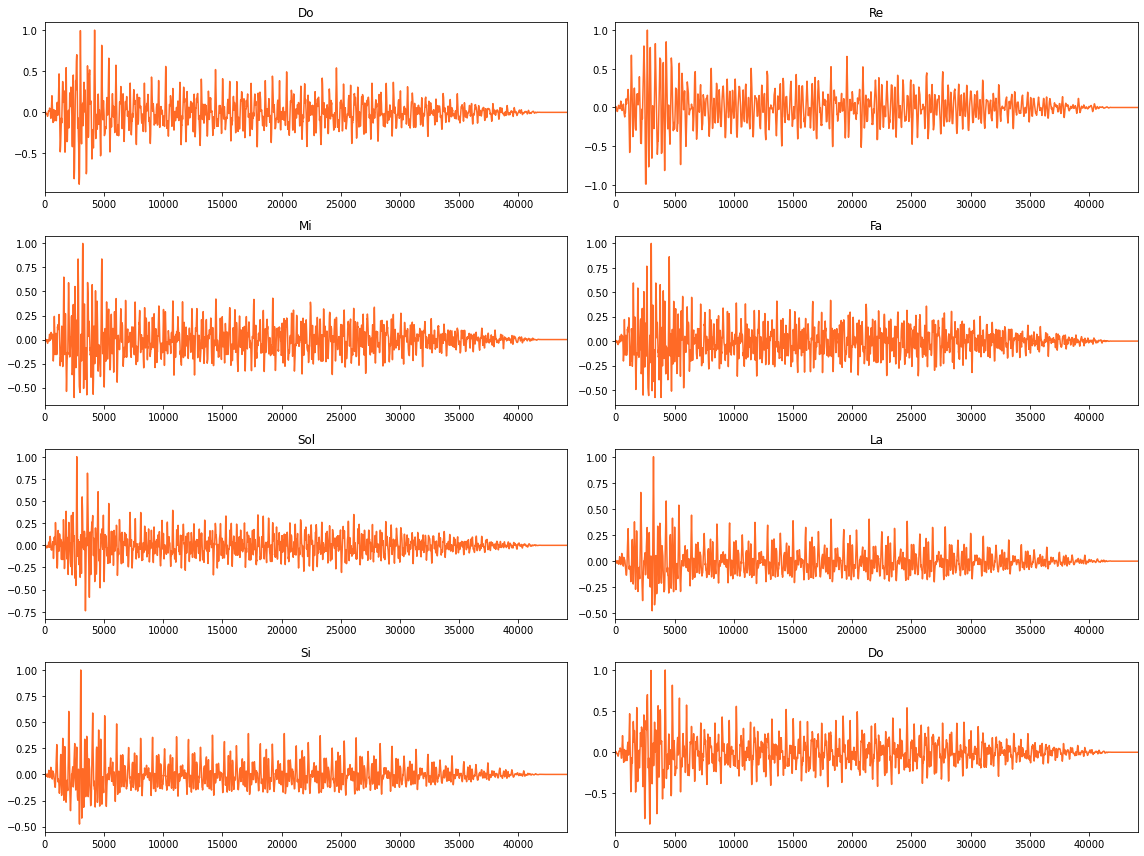

In [73]:
notas = (
    ((0, 0), Do, 'Do'),
    ((0, 1), Re, 'Re'),
    ((1, 0), Mi, 'Mi'),
    ((1, 1), Fa, 'Fa'),
    ((2, 0), Sol, 'Sol'),
    ((2, 1), La, 'La'),
    ((3, 0), Si, 'Si'),
    ((3, 1), Do, 'Do'),
)

fig, ax = plt.subplots(4, 2, figsize = (16, 12))

rasguido = 0
for pos, nota, nombre in notas:

    duracion = 1

    ax[pos[0], pos[1]].plot(envolvente(nota, duracion, fm), color = '#FF6A26')
    ax[pos[0], pos[1]].set_title(nombre) # Escogemos un título para el gráfico
    ax[pos[0], pos[1]].set_xlim(0, fm * duracion)

    print(f'Actualmente suena la nota {nombre}')

    sd.play(envolvente(nota, duracion, fm), fm)
    sd.wait()

    clear_output(wait = True)

# plt.plot(envolvente(rasguido, duracion, fm), color = 'orange')

plt.tight_layout()
plt.show()

In [65]:
'''
House of the Rising Sun

[Intro]
   Am                      C                       D                       F
e|-------------0-----------------------0-------------------2---2-------------------1---1-----------|
B|---------1-------1---------------1-------1-------------3---------3-------------1---------1-------|
G|-------2-------------0---------0-------------0-------2---------------0-------2---------------0---|
D|-----2-----------------------2-------------------0-----------------------3-----------------------|
A|-0-----------------------3-----------------------------------------------------------------------|
E|-------------------------------------------------------------------------------------------------|
 
   Am                      E                       Am                      E
e|-----------0-0-----------------------0-----------------------0-----------------------0-----------|
B|---------1-------1----------------(0)----0---------------1-------1-----------------0-----0-------|
G|-------2-------------0-----------1-----------0---------2-------------0-----------1-----------0---|
D|-----2-------------------------2---------------------2-------------------------2-----------------|
A|-0---------------------------2-------------------0---------------------------2-------------------|
E|-------------------------0-----------------------------------------------0-----------------------|
'''

duracion_1 = 0.35
duracion_2 = 0.55

cancion = [
   (crear_acorde([(4, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_2), duracion_2),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 3)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_1), duracion_1),
   (crear_acorde([(2, 1)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 3)], duracion_1), duracion_1),
   (crear_acorde([(0, 2)], duracion_2), duracion_2),
   (crear_acorde([(0, 2)], duracion_2), duracion_2),
   (crear_acorde([(1, 3)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 3)], duracion_2), duracion_2),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 1)], duracion_2), duracion_2),
   (crear_acorde([(0, 1)], duracion_2), duracion_2),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(5, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 2)], duracion_1), duracion_1),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 1)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_2), duracion_2),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(5, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 2)], duracion_1), duracion_1),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 1)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2)
]


In [21]:
'''
Wild World
e|-------------5-----------|-------------5-----------|
B|-------5--------5-----5--|-------5--------5-----5--|
G|----7-----7--------7-----|----7-----7--------7-----|
D|-0-----------------------|-0-----------------------|
A|-------------------------|-------------------------|
E|-------------------------|-------------------------|
'''

duracion_1 = 0.4
duracion_2 = 0.7

cancion = [
   (crear_acorde([(3, 0)], duracion_1), duracion_1),
   (crear_acorde([(2, 7)], duracion_1), duracion_1),
   (crear_acorde([(1, 5)], duracion_1), duracion_1),
   (crear_acorde([(2, 7)], duracion_2), duracion_2),
   (crear_acorde([(0, 5)], duracion_1), duracion_1),
   (crear_acorde([(1, 5)], duracion_1), duracion_1),
   (crear_acorde([(2, 7)], duracion_1), duracion_1),
   (crear_acorde([(1, 5)], duracion_1), duracion_1)
]


In [18]:
'''
Dark red

E|--------------------------------------|
B|--------------------------------------|
G|--------------------------------------|
D|--------------------------------------|. x4
A|----------------6-6--4-4--------------|
E|-6-6--5-5--4-4-4----------7-7--6-6-6--|
'''
duracion_1 = 0.4
duracion_2 = 0.6

cancion = [
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 5)], duracion_1), duracion_1),
   (crear_acorde([(5, 5)], duracion_2), duracion_2),
   (crear_acorde([(5, 4)], duracion_1), duracion_1),
   (crear_acorde([(5, 4)], duracion_1), duracion_1),
   (crear_acorde([(5, 4)], duracion_1), duracion_1),
   (crear_acorde([(4, 6)], duracion_1), duracion_1),
   (crear_acorde([(4, 6)], duracion_2), duracion_2),
   (crear_acorde([(4, 4)], duracion_1), duracion_1),
   (crear_acorde([(4, 4)], duracion_2), duracion_2),
   (crear_acorde([(5, 7)], duracion_1), duracion_1),
   (crear_acorde([(5, 7)], duracion_2), duracion_2),
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 6)], duracion_2), duracion_2)
]

In [23]:
'''
Wish you were here

e|------------------|-3--3--3--3-3-|--------------|--3--3--3--3-3--|
B|------------------|-3--3--3--3-3-|--------------|--3--3--3--3-3--|
G|------------------|-0--0--0--0-0-|----0---------|--0--0--0--0-0--|
D|-------------0--2-|-2--2--2--2-2-|-------2--0---|--0--0--0--0-0--| x2
A|------0h2---------|-2--2--2--2-2-|--------------|--2--2--2--2-2--|
E|---(3)------------|-x--x--x--x-x-|--------------|--3--3--3--3-3--|
'''

duracion_1 = 0.5
duracion_2 = 0.7
duracion_3 = 1.2

cancion = [
    (crear_acorde([(5, 3)], duracion_1), duracion_1),
    (crear_acorde([(4, 0)], duracion_3), duracion_3),
    (crear_acorde([(3, 0)], duracion_2), duracion_2),
    (crear_acorde([(3, 2)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_1), duracion_1),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_3), duracion_3),
    (crear_acorde([(2, 0)], duracion_2), duracion_2),
    (crear_acorde([(3, 2)], duracion_2), duracion_2),
    (crear_acorde([(3, 0)], duracion_3), duracion_3),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_1), duracion_1),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(5, 3)], duracion_1), duracion_1),
    (crear_acorde([(4, 0)], duracion_3), duracion_3)
]

In [69]:
def tocar_cancion(cancion, parametro_f = 1):

   fig, ax = plt.subplots(figsize = (8, 4))

   for elemento in cancion:
      acorde, duracion = elemento[0], elemento[1]
      
      sd.play(envolvente(acorde, duracion, fm), fm * parametro_f)
      sd.wait()

      plt.plot(envolvente(acorde, duracion, fm), color = '#FF6A26')
   
   plt.show()

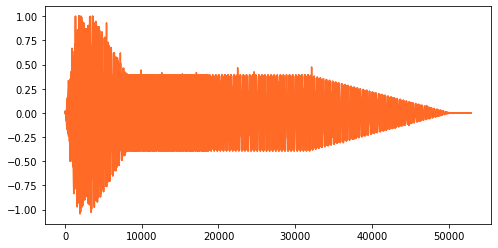

In [70]:
tocar_cancion(cancion, 1.6)

In [25]:
def delay(sonido, tiempo_delay, coeficiente, fm = 44100):
    
    feedback = []
    a_max = max(sonido)

    for i in range(len(sonido)):
        sonido[i] = sonido[i] / a_max

    if coeficiente == 0:
        return sonido

    try:

        while max(sonido) > 0.01:
            for j in range(len(sonido)):

                feedback.append(sonido[j])
                sonido[j] = sonido[j] * exp(- (1 - coeficiente) * 2.5)
                
            for _ in range(ceil(tiempo_delay * fm)):
                feedback.append(0)

        return feedback

    except tiempo_delay < 0 or coeficiente < 0:
        raise ValueError


In [81]:
duracion = 2    # tiempo en segundos
sonido = s(0.324, duracion, a = 1)

tiempo_delay = 0.2          # tiempo en segundos
coeficiente_delay = 0.2     # decimal que fluctúa entre 0 y 1    

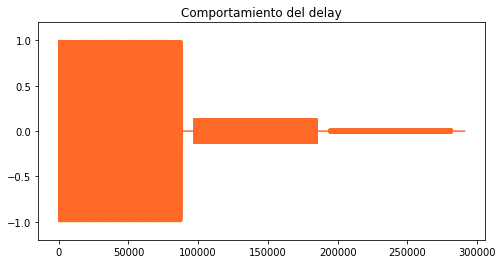

In [83]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_ylim(-1.2, 1.2)
plt.title('Comportamiento del delay')
plt.plot(delay(sonido, tiempo_delay, coeficiente_delay), color = '#FF6A26')

#--------------------------------------------------------------------------------------------------------------------------------

sd.play(delay(sonido, tiempo_delay, coeficiente_delay), fm) #suena la rosada 

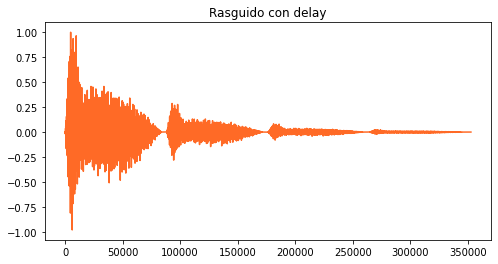

In [55]:
duracion = 2
tiempo_delay = 0
coeficiente_delay = 0.5

fig, ax = plt.subplots(figsize = (8, 4))

sd.play(delay(envolvente(sonido_rasguido(duracion), duracion, fm), tiempo_delay, coeficiente_delay), fm) #suena la rosada 
plt.plot(delay(envolvente(sonido_rasguido(duracion), duracion, fm), tiempo_delay, coeficiente_delay), color = '#FF6A26')
plt.title('Rasguido con delay')
plt.show()

In [80]:
def tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay, parametro_f = 1, fm = 44100):
   
      cancion_delay = []
      largo_cancion = len(cancion)

      acumulado = 0
      for i in range(largo_cancion):
            
            elemento = cancion[i]
            acorde, duracion = elemento[0], elemento[1]
            acumulado += duracion

            acorde = ceil(fm * acumulado) * [0] + delay(envolvente(acorde, duracion, fm * parametro_f), tiempo_delay, coeficiente_delay)
            # cancion_delay.append(acorde)
            
            for j in range(len(acorde)):
                  try:
                        cancion_delay[j] += acorde[j]
                        
                  except IndexError:
                        cancion_delay.append(acorde[j])
      
      maximo = max(cancion_delay)

      for k in range(len(cancion_delay)):
            cancion_delay[k] = cancion_delay[k] / maximo
      
      return cancion_delay
      

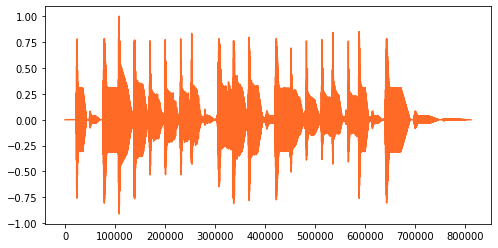

In [52]:
fig, ax = plt.subplots(figsize = (8, 4))

sd.play(tocar_cancion_delay(cancion, 0.1, 0.1), fm)

plt.plot(tocar_cancion_delay(cancion, 0.1, 0.1), color = '#FF6A26')
plt.show()

In [33]:
def rect(x):
    
    if 0 <= x and x <= 1:
        return 1

    return 0

In [34]:
def pasa_bajos(sonido, frecuencia):
    dft = np.fft.rfft(sonido)             #transformada discreta de Fourier
    for i in range(len(dft)):
        dft[i] = dft[i] * rect((i) / (16 * frecuencia))
    return np.fft.irfft(dft)

def pasa_altos(sonido, frecuencia):
    dft = np.fft.rfft(sonido)             #transformada discreta de Fourier
    for i in range(len(dft)):
        dft[i] = dft[i] * (1 - rect((i) / (16 * frecuencia)))
    return np.fft.irfft(dft)

def pasa_banda(sonido, frecuencias):
    p_altos = pasa_altos(sonido, frecuencias[0])
    return pasa_bajos(p_altos, frecuencias[1])

def rechaza_banda(sonido, frecuencias):
    p_bajos = pasa_bajos(sonido, frecuencias[0])
    p_altos = pasa_altos(p_bajos, frecuencias[1])
    return p_bajos + p_altos

In [44]:
frecuencia = 200
f_pasa_banda = (300, 900)
f_rechaza_banda = (200, 400)
tiempo_delay = 0.1
coeficiente_delay = 0.1

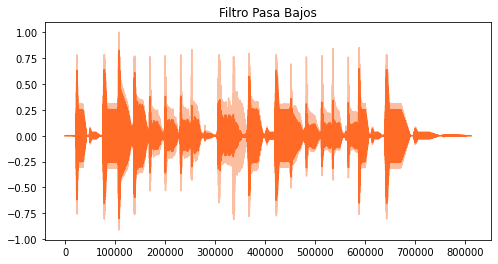

In [45]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), color = '#FCBEA1')
plt.plot(pasa_bajos(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), frecuencia), color = '#FF6A26')
plt.title('Filtro Pasa Bajos')
sd.play(pasa_bajos(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), frecuencia), fm)
sd.wait()

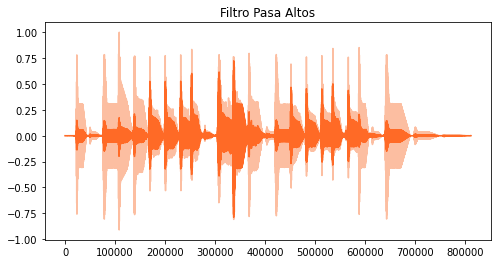

In [48]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), color = '#FCBEA1')
plt.plot(pasa_altos(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), frecuencia), color = '#FF6A26')
plt.title('Filtro Pasa Altos')
sd.play(pasa_altos(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), frecuencia), fm)
sd.wait()

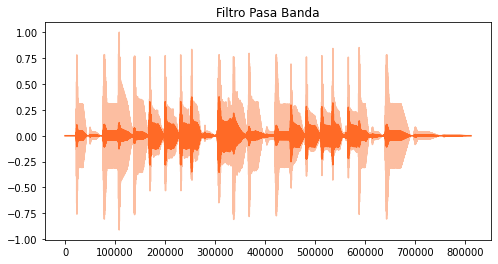

In [49]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), color = '#FCBEA1')
plt.plot(pasa_banda(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), f_pasa_banda), color = '#FF6A26')
plt.title('Filtro Pasa Banda')
sd.play(pasa_banda(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), f_pasa_banda), fm)
sd.wait()

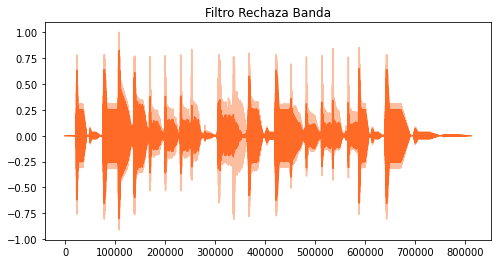

In [50]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), color = '#FCBEA1')
plt.plot(rechaza_banda(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), f_rechaza_banda), color = '#FF6A26')
plt.title('Filtro Rechaza Banda')
sd.play(rechaza_banda(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), f_rechaza_banda), fm)
sd.wait()

In [35]:
def ecualizador(sonido, parametros):
    ecualizado = []

    filtros = [
        pasa_bajos(sonido, parametros['p_bajo_1']),
        pasa_altos(sonido, parametros['p_alto']),
        pasa_banda(sonido, parametros['p_banda']),
        rechaza_banda(sonido, parametros['r_banda']),
        pasa_bajos(sonido, parametros['p_bajo_2'])
    ]
    
    for i in sum(filtros):
        ecualizado.append(i / 5)

    return ecualizado
    

In [36]:
params = {
    'p_bajo_1': 800,
    'p_bajo_2': 1050,
    'p_alto': 450,
    'p_banda': (300, 600),
    'r_banda': (500, 700)
}

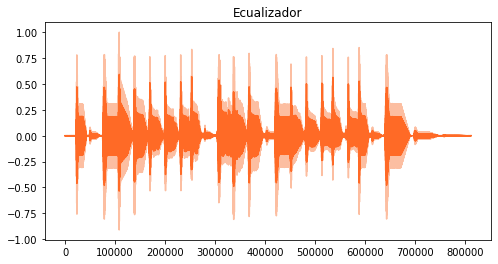

In [51]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), color = '#FCBEA1')
plt.plot(ecualizador(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), params), color = '#FF6A26')
plt.title('Ecualizador')
sd.play(ecualizador(tocar_cancion_delay(cancion, tiempo_delay, coeficiente_delay), params), fm)
sd.wait()